In [1]:
import pandas as pd
import psycopg2
import sqlalchemy
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
import matplotlib.ticker as mtick

%matplotlib inline

In [3]:
from sqlalchemy import create_engine

POSTGRES_ADDRESS = "localhost"
POSTGRES_PORT = "5432"
POSTGRES_USERNAME = "postgres"
POSTGRES_PASSWORD = "infobip"
POSTGRES_DBNAME = "postgres"

postgres_str = ("postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}"
                .format(username = POSTGRES_USERNAME,
                       password = POSTGRES_PASSWORD,
                       ipaddress = POSTGRES_ADDRESS,
                       port = POSTGRES_PORT,
                       dbname = POSTGRES_DBNAME))

conn = create_engine(postgres_str)

In [111]:
pd.read_sql_query('''select * from smstraffichighfreq limit 5''', conn)

,windowstarttime,windowendtime,smschannelid,gatewayid,networkid,smscount
0,2019-12-15 15:48:20,2019-12-15 15:53:20,261000,15,5663,480
1,2019-12-15 15:48:20,2019-12-15 15:53:20,261000,15,540,547
2,2019-12-15 15:48:20,2019-12-15 15:53:20,260987,15,5663,507
3,2019-12-15 15:48:20,2019-12-15 15:53:20,260987,15,540,518
4,2019-12-15 15:48:20,2019-12-15 15:53:20,261000,13,5663,519


In [112]:
df1 = pd.read_sql_query('''select windowstarttime as datetime, sum(smscount) as smscount from smstraffichighfreq
where windowstarttime between '2019-12-15 15:00:00' and '2019-12-15 18:00:00'
group by windowstarttime
order by datetime;''', conn)

#df1

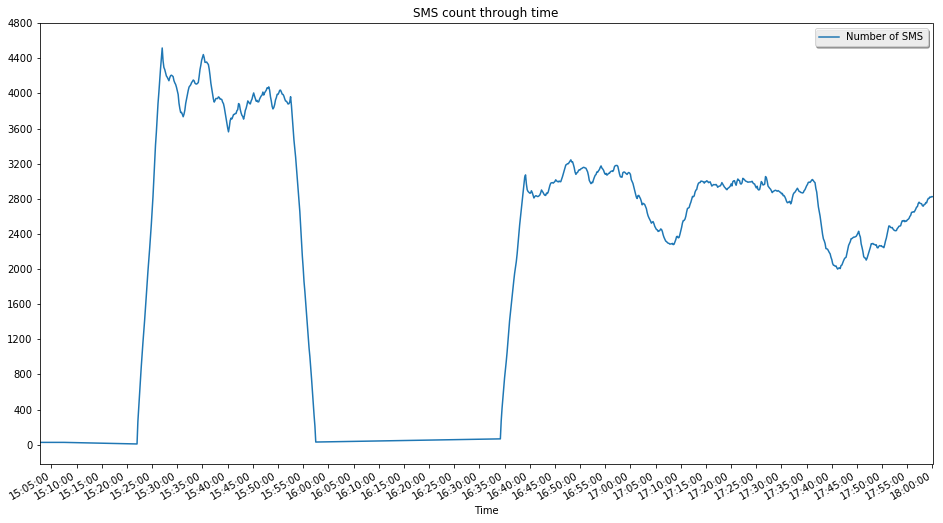

In [171]:
ax = plt.gca()
ax.grid(which='both')

df1.plot(kind='line',x='datetime',y='smscount',ax=ax,figsize=(16,9))
plt.title('SMS count through time')
y = [0,1000,2000,3000,4000,5000]
plt.yticks(np.arange(min(y), max(y)+1, 400.0))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.legend(labels=['Number of SMS'], shadow=True, fancybox=True)
ax.set_xlabel('Time')
plt.savefig('SMS_through_time.png')
plt.show()

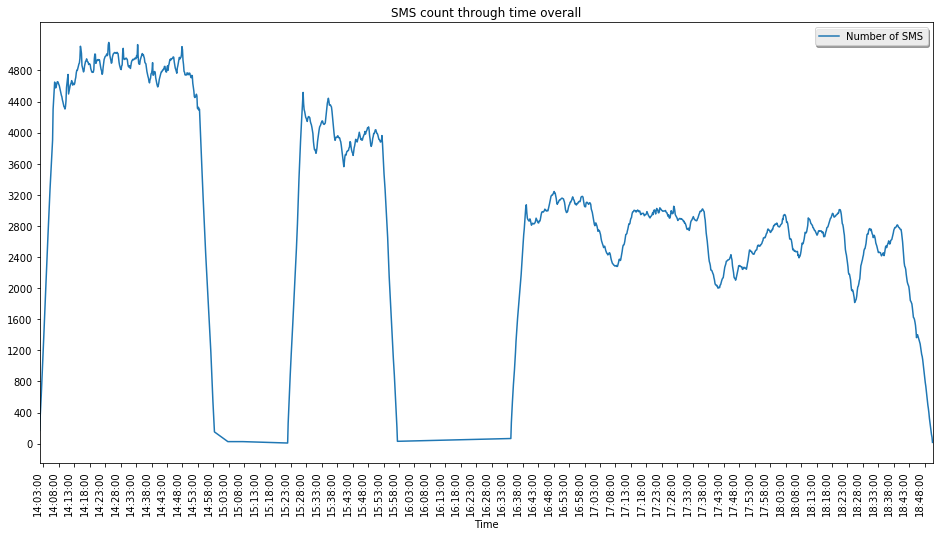

In [49]:
df2 = pd.read_sql_query('''select windowstarttime as datetime, sum(smscount) as smscount from smstraffichighfreq
group by windowstarttime
order by datetime;''', conn)

ax = plt.gca()
ax.grid(which='both')


df2.plot(kind='line',x='datetime',y='smscount',ax=ax,figsize=(16,9))
plt.title('SMS count through time overall')
y = [0,1000,2000,3000,4000,5000]
plt.yticks(np.arange(min(y), max(y)+1, 400.0))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.legend(labels=['Number of SMS'], shadow=True, fancybox=True)
ax.set_xlabel('Time')
plt.xticks(rotation=90)
plt.savefig('SMS_through_time_overall.png')
plt.show()

In [173]:
df3 = pd.read_sql_query('''select gatewayid, count(gatewayid) from smstraffichighfreq
group by gatewayid
order by count desc limit 5;''', conn)

df3

,gatewayid,count
0,13,3503
1,15,3413
2,4257,1710
3,910,1680
4,2312,1590


In [178]:
df3 = pd.read_sql_query('''select windowstarttime as datetime, sum(smscount) as smscount from smstraffichighfreq
where windowstarttime between '2019-12-15 15:00:00' and '2019-12-15 18:00:00' and gatewayid in (13,15)
group by windowstarttime
order by datetime;''', conn)

#df3

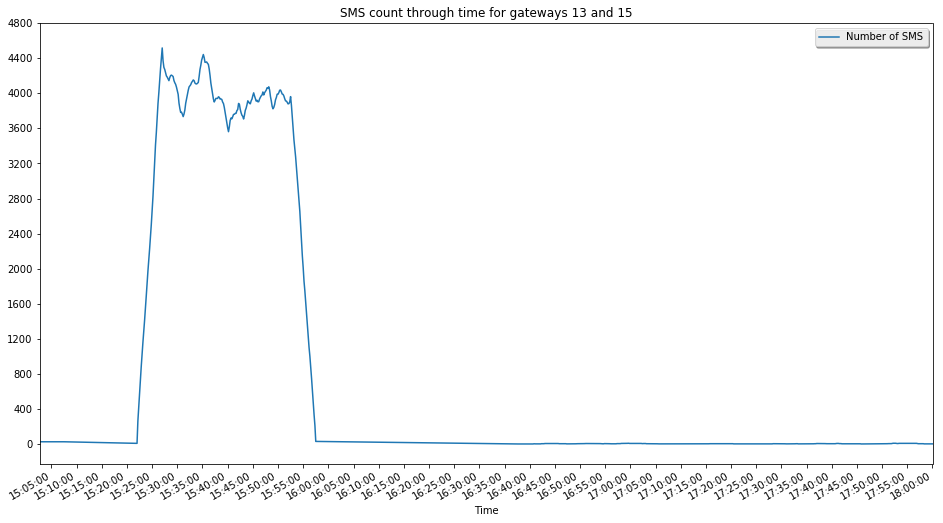

In [179]:
ax = plt.gca()
ax.grid(which='both')

df4.plot(kind='line',x='datetime',y='smscount',ax=ax,figsize=(16,9))
plt.title('SMS count through time for gateways 13 and 15')
y = [0,1000,2000,3000,4000,5000]
plt.yticks(np.arange(min(y), max(y)+1, 400.0))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.legend(labels=['Number of SMS'], shadow=True, fancybox=True)
ax.set_xlabel('Time')
plt.savefig('SMS_through_time_gateways_13_15.png')
plt.show()

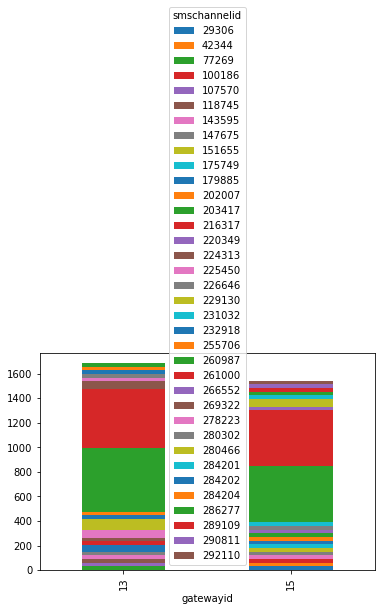

In [35]:
df5 = pd.read_sql_query('''select * from smstraffichighfreq where (gatewayid = 13 or gatewayid = 15)
and windowstarttime between '2019-12-15 15:00:00' and '2019-12-15 18:00:00';''', conn)
#df5
df5.groupby(['gatewayid','smschannelid']).size().unstack().plot(kind='bar',stacked=True)
#plt.title('Number of SMSChannelIDs used on gateways 13 and 15')
plt.savefig('Num_of_sms_channels_used_on_gateway_13_15.png')
plt.show()

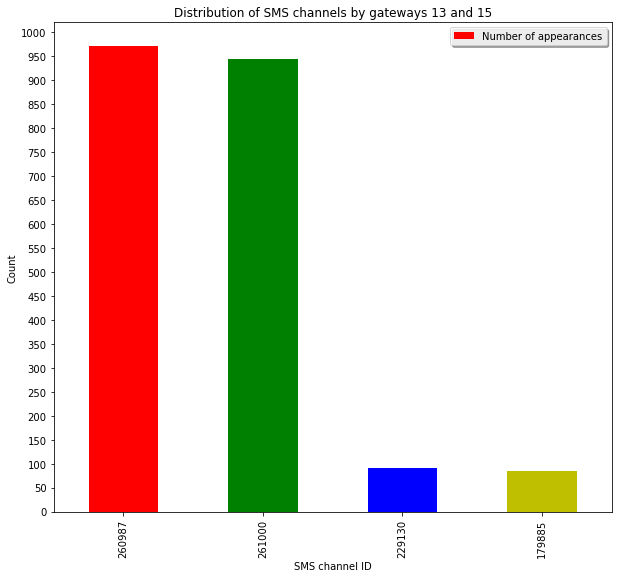

In [52]:
df6 = pd.read_sql_query('''select smschannelid, count(*) as smschannelid_count from smstraffichighfreq
where windowstarttime between '2019-12-15 15:00:00' and '2019-12-15 18:00:00' and gatewayid in (13,15)
group by smschannelid
order by smschannelid_count desc
limit 4;''', conn)

#df6

my_colors = 'rgby'
df6.plot(kind='bar',x='smschannelid',y='smschannelid_count',figsize=(10,9),color=my_colors)
y = [0,100,200,300,400,500,600,700,800,900,1000]
plt.yticks(np.arange(min(y), max(y)+1, 50.0))
plt.title('Distribution of SMS channels by gateways 13 and 15')
plt.xlabel('SMS channel ID')
plt.ylabel('Count')
plt.legend(['Number of appearances'],shadow=True, fancybox=True)
plt.savefig('Dsitribution_of_SMS_ChannelIDs_per_gateways 13_15.png')
plt.show()

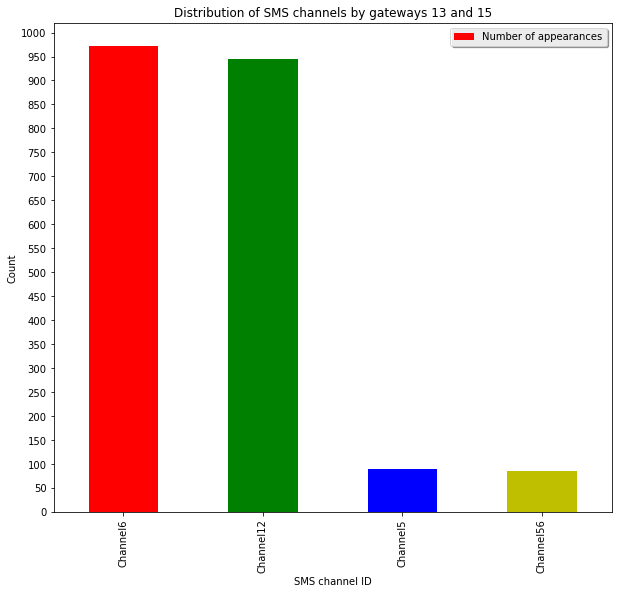

In [53]:
df7 = pd.read_sql_query('''select a.smschannelid, b.smschannelname, count(*) as smschannelid_count 
from smstraffichighfreq a inner join smschannel b on a.smschannelid = b.smschannelid
and a.windowstarttime between '2019-12-15 15:00:00' and '2019-12-15 18:00:00' and a.gatewayid in (13,15)
group by a.smschannelid, b.smschannelname
order by smschannelid_count desc;''', conn)

#df7

my_colors = 'rgby'
df7.plot(kind='bar',x='smschannelname',y='smschannelid_count',figsize=(10,9),color=my_colors)
y = [0,100,200,300,400,500,600,700,800,900,1000]
plt.yticks(np.arange(min(y), max(y)+1, 50.0))
plt.title('Distribution of SMS channels by gateways 13 and 15')
plt.xlabel('SMS channel ID')
plt.ylabel('Count')
plt.legend(['Number of appearances'],shadow=True, fancybox=True)
plt.savefig('Dsitribution_of_SMS_ChannelIDs_per_gateways_13_15_with_names.png')
plt.show()

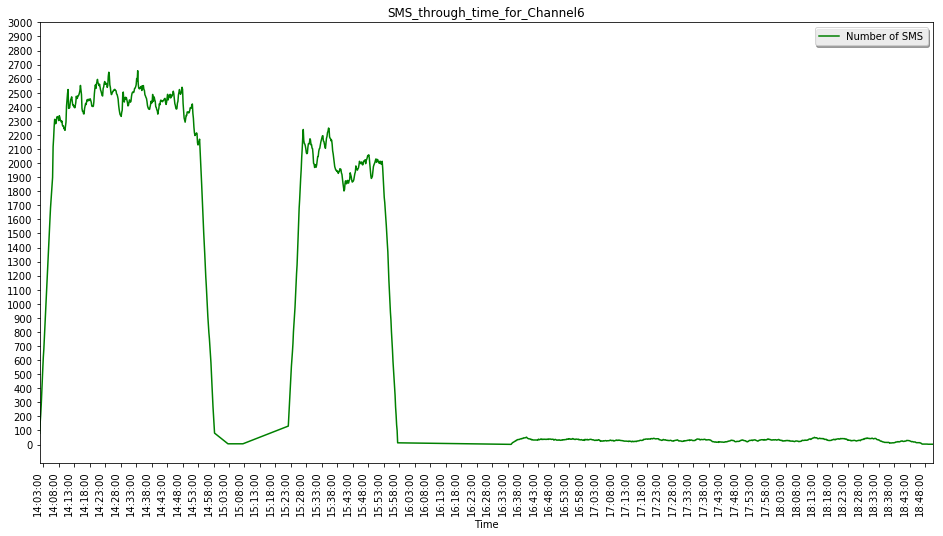

In [50]:
df8 = pd.read_sql_query('''select windowstarttime as datetime, sum(smscount) as smscount from smstraffichighfreq
where smschannelid = 260987
group by windowstarttime
order by datetime;''', conn)

#df8

ax = plt.gca()
ax.grid(which='both')

df8.plot(kind='line',x='datetime',y='smscount',ax=ax,figsize=(16,9), color='green')
plt.title('SMS_through_time_for_Channel6')
y = [0,1000,2000,3000]
plt.yticks(np.arange(min(y), max(y)+1, 100.0))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.legend(labels=['Number of SMS'], shadow=True, fancybox=True)
ax.set_xlabel('Time')
plt.xticks(rotation=90)
plt.savefig('SMS_through_time_for_Channel6')
plt.show()